We got employee data from a few companies. We have data about all employees who joined
from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the
company as of 2015/12/13 or they have quit. Beside that, we have general info about the
employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers.
Specifically, you should:
 - Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate
employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have
already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
You should create a table with 3 columns: day, employee_headcount, company_id.
- What are the main factors that drive employee churn? Do they make sense? Explain your
findings.
- If you could add to this data set just one variable that could help explain employee churn,
what would that be?

In [3]:
import pandas as pd

df = pd.read_csv("/Users/ishashah/Documents/Python Training/DatascienceBook/employee_retention_data.csv")
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
import datetime as dt

In [5]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [6]:
df.loc[df['seniority'] > 75,:]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [7]:
df['dept'].value_counts()

customer_service    9180
engineer            4613
data_science        3190
sales               3172
marketing           3167
design              1380
Name: dept, dtype: int64

In [8]:
len(df['employee_id'].unique())

24702

- Remove semiority outliers abpve 75. There are 2 outliers so removing them from the dataframe

In [9]:
df = df.loc[df['seniority']<75,:]

In [10]:
df.describe()

,employee_id,company_id,seniority,salary
count,24700.000000,24700.000000,24700.000000,24700.000000
mean,501616.624899,3.426802,14.120972,138176.275304
std,288908.533280,2.699752,8.054137,76056.331953
min,36.000000,1.000000,1.000000,17000.000000
25%,250165.250000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753142.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,29.000000,408000.000000


In [11]:
df.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [14]:
df.join_date = pd.to_datetime(df.join_date,infer_datetime_format=True)
df.quit_date = df.quit_date.fillna(dt.date.today())
df.quit_date = pd.to_datetime(df.quit_date,infer_datetime_format=True)
df.quit_date = df.quit_date.dt.date
df.quit_date = pd.to_datetime(df.quit_date,infer_datetime_format=True)
#print(df['quit_date'])

In [15]:
import numpy as np
df['length'] = df['quit_date'] - df['join_date']
df['length'] = df['length'].apply(lambda x :  x/np.timedelta64(1,'D'))
#print(df['length'])
df.describe()

,employee_id,company_id,seniority,salary,length
count,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000
mean,501616.624899,3.426802,14.120972,138176.275304,901.435911
std,288908.533280,2.699752,8.054137,76056.331953,478.550081
min,36.000000,1.000000,1.000000,17000.000000,102.000000
25%,250165.250000,1.000000,7.000000,79000.000000,403.000000
50%,500793.000000,2.000000,14.000000,123000.000000,840.000000
75%,753142.250000,5.000000,21.000000,187000.000000,1204.000000
max,999969.000000,12.000000,29.000000,408000.000000,2499.000000


In [16]:
df.head(20)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2017-12-04,1148.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578.0
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2017-12-04,1505.0
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2017-12-04,1370.0
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1047.0
9,504159.0,1,sales,7,104000.0,2012-06-12,2017-12-04,2001.0


In [17]:
join_df = df.groupby(['company_id','join_date']).employee_id.count().unstack('company_id').fillna(0)
idx = pd.date_range(df.join_date.min(),df.quit_date.max(),freq='D')
join_df = join_df.reindex(idx).fillna(0)
join_df = join_df[join_df.index<'2016-01-01']

In [18]:
quit_df = df.groupby(['company_id','quit_date']).employee_id.count().unstack('company_id').fillna(0)
quit_df = quit_df.reindex(idx).fillna(0)
quit_df = quit_df[quit_df.index<'2016-01-01']

In [21]:
new_df = join_df.subtract(quit_df).fillna(0)
for col in new_df.columns.values:
    new_df[col] = new_df[col].cumsum()
new_df.head(10)


company_id,1,2,3,4,5,6,7,8,9,10,11,12
2011-01-24,25.0,17.0,9.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-25,27.0,19.0,10.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-26,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-27,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-28,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-29,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-30,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-31,59.0,31.0,19.0,18.0,13.0,10.0,7.0,11.0,6.0,1.0,0.0,0.0
2011-02-01,66.0,33.0,20.0,19.0,13.0,11.0,7.0,11.0,7.0,1.0,0.0,0.0
2011-02-02,67.0,35.0,20.0,19.0,13.0,11.0,7.0,12.0,7.0,2.0,0.0,0.0


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

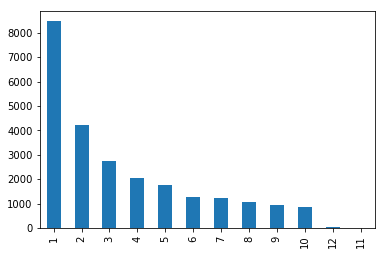

In [38]:
company_dist = df['company_id'].value_counts()
company_dist.plot(kind='bar')

In [39]:
company_ret = df.groupby('company_id')['quit_date'].agg('count')

In [40]:
print(company_ret) # people who have quit

company_id
1     8485
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     864
11      16
12      24
Name: quit_date, dtype: int64


In [41]:
company_not_quit = df.groupby('company_id')['quit_date'].agg({lambda x : x.isnull().sum()})

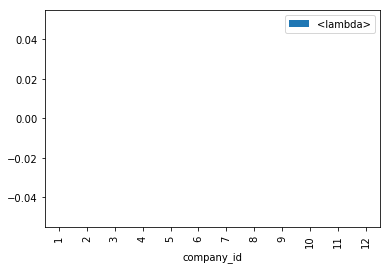

In [42]:
#print(company_not_quit) #people who have not quit
company_not_quit.plot(kind='bar')

In [43]:
df['company_id'].value_counts()

1     8485
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     864
12      24
11      16
Name: company_id, dtype: int64

In [44]:
# for each day/company how many people joined

company_day_join = df.groupby(['join_date','company_id'])['join_date'].agg('count')
print(company_day_join)

join_date   company_id
2011-01-24  1             25
            2             17
            3              9
            4             12
            5              5
            6              3
            7              1
            8              6
            9              3
2011-01-25  1              2
            2              2
            3              1
2011-01-26  1              2
            3              2
            4              1
            5              1
2011-01-31  1             30
            2             12
            3              7
            4              5
            5              7
            6              7
            7              6
            8              5
            9              3
            10             1
2011-02-01  1              7
            2              2
            3              1
            4              1
                          ..
2015-12-01  1              3
            2              3
            3       

In [45]:
company_day_quit = df.groupby(['quit_date','company_id'])['quit_date'].agg('count')
print(company_day_quit)

quit_date   company_id
2011-10-13  6                1
2011-10-14  10               1
2011-10-21  1                1
2011-10-28  4                1
2011-11-11  1                1
2011-11-22  1                1
2011-11-25  1                1
            2                1
2011-12-02  6                1
            8                1
2011-12-09  1                1
            4                1
            8                1
2011-12-13  2                1
2011-12-16  1                1
            2                2
            4                3
            5                1
            8                1
2011-12-23  1                2
            3                1
            6                1
            7                1
            8                2
            10               1
2011-12-30  1                4
            2                1
            3                1
            4                1
2012-01-03  1                1
                          ... 
2015-12-01  3   

In [46]:
unique_dates = list(df['join_date'].unique())

In [27]:
print(new_df[new_df.columns.values[4]])

2011-01-24      5.0
2011-01-25      5.0
2011-01-26      6.0
2011-01-27      6.0
2011-01-28      6.0
2011-01-29      6.0
2011-01-30      6.0
2011-01-31     13.0
2011-02-01     13.0
2011-02-02     13.0
2011-02-03     13.0
2011-02-04     13.0
2011-02-05     13.0
2011-02-06     13.0
2011-02-07     17.0
2011-02-08     18.0
2011-02-09     18.0
2011-02-10     20.0
2011-02-11     20.0
2011-02-12     20.0
2011-02-13     20.0
2011-02-14     35.0
2011-02-15     35.0
2011-02-16     35.0
2011-02-17     35.0
2011-02-18     35.0
2011-02-19     35.0
2011-02-20     35.0
2011-02-21     35.0
2011-02-22     40.0
              ...  
2015-12-02    769.0
2015-12-03    769.0
2015-12-04    766.0
2015-12-05    766.0
2015-12-06    766.0
2015-12-07    772.0
2015-12-08    772.0
2015-12-09    772.0
2015-12-10    772.0
2015-12-11    772.0
2015-12-12    772.0
2015-12-13    772.0
2015-12-14    772.0
2015-12-15    772.0
2015-12-16    772.0
2015-12-17    772.0
2015-12-18    772.0
2015-12-19    772.0
2015-12-20    772.0


In [47]:
print(len(unique_dates))

995


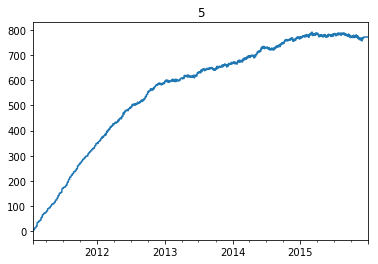

In [25]:
new_df[new_df.columns.values[4]].plot(title = new_df.columns.values[4])
# Plotting the graph of company_id 5

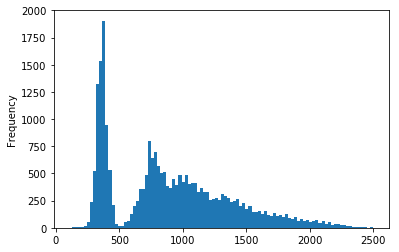

In [28]:
df['length'].plot(kind='hist',bins = 100)

In [30]:
print(df['length'].mode()[0],"Days")

375.0 Days


close to 1 year. Makes sense, any bonuses would be received at the end of the year. Based on the graph above, 
we might be able to say that the next popular time to quit would be after 2 years.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

df['dept'] = LabelEncoder().fit_transform(df['dept'])
predictors = ['company_id', 'dept', 'seniority', 'salary']
predicted = ['length']

model = DecisionTreeRegressor()
model.fit(df[predictors],df[predicted])
for v in sorted(zip(model.feature_importances_,predictors),reverse = True):
    print(v)


(0.40085342334145768, 'salary')
(0.31767700903843565, 'seniority')
(0.1956340501217064, 'company_id')
(0.085835517498400418, 'dept')


In [41]:
from sklearn.tree import DecisionTreeClassifier
df['leave'] = df['length'] < 400
predictors = ['company_id','salary','seniority','dept']
predicted = ['leave']

model = DecisionTreeClassifier()
model.fit(df[predictors],df[predicted])
for v in sorted(zip(model.feature_importances_,predictors),reverse = True):
    print(v)


(0.40876679329395949, 'salary')
(0.32596592299342297, 'seniority')
(0.182163441966392, 'company_id')
(0.083103841746225413, 'dept')


I tried this out with a classifier to see if my assumptions using the decision tree regressors were consistent and the feature importances were the same. The reason I set the length threshold to 400 was to capture more of the first distribution of those who left after 1 year. Once again, we see that salary is the most important followed by seniority.

Conclusions
1. Given how important is salary, I would definitely love to have as a variable the salary the employee
who quit was offered in the next job. Otherwise, things like: promotions or raises received during
the employee tenure would be interesting.
2. The major findings are that employees quit at year anniversaries or at the beginning of the year.
Both cases make sense. Even if you don’t like your current job, you often stay for 1 yr before
quitting + you often get stocks after 1 yr so it makes sense to wait. Also, the beginning of the year is
well known to be the best time to change job: companies are hiring more and you often want to stay
until end of Dec to get the calendar year bonus.
3. Employees with low and high salaries are less likely to quit. Probably because employees with high
salaries are happy there and employees with low salaries are not that marketable, so they have a
hard time finding a new job.